# Comp 472 Mini-Project 1

# Task 1: Dataset Analysis & Preparation

## Imports

In [1]:
import gzip
import json
import matplotlib.pyplot as plt

## 1.2 Loading the dataset

In [2]:
with gzip.open("dataset/goemotions.json.gz", "rb") as f:
    data = json.loads(f.read())

## 1.3 Extracting posts, emotions, and sentiments & plotting categories

### Extract data

In [3]:
posts = []
emotions = []
sentiments = []

# Extract posts, emotions, sentiments into lists
for d in data:
    posts.append(d[0])
    emotions.append(d[1])
    sentiments.append(d[2])   

# Gather emotion and sentiment data
# key:value = 'emotion': list of posts with this emotion     
emotions_dic = {}
for em in set(emotions):
    emotions_dic[em] = [w[0] for w in data if em == w[1]]
    
# key:value = 'sentiment': list of posts with this sentiment  
sentiments_dic = {}
for st in set(sentiments):
    sentiments_dic[st] = [w[0] for w in data if st == w[2]]   

### Plot categories

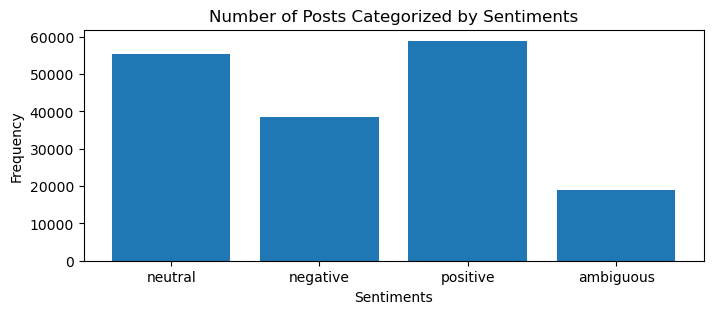

In [4]:
x_names = sentiments_dic.keys() 
y_values = [len(sentiments_dic[w]) for w in x_names] # number of posts with each key

fig1, ax = plt.subplots(figsize=(8,3))
ax.bar(x_names,y_values)
ax.set_xlabel('Sentiments')
ax.set_ylabel('Frequency')
ax.set_title("Number of Posts Categorized by Sentiments")
plt.savefig('sentiments_bar_plot.pdf',bbox_inches='tight')  
plt.show()

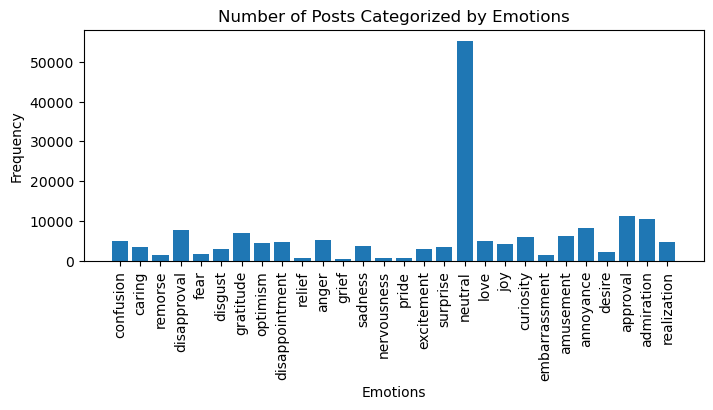

In [5]:
x_names = emotions_dic.keys() 
y_values = [len(emotions_dic[w]) for w in x_names] # number of posts with each key

fig2, ax = plt.subplots(figsize=(8,3))
ax.bar(x_names,y_values)
ax.set_xlabel('Emotions')
ax.set_ylabel('Frequency')
plt.xticks(rotation='vertical')
ax.set_title("Number of Posts Categorized by Emotions")
plt.savefig('emotions_bar_plot.pdf',bbox_inches='tight')  
plt.show()